<a href="https://colab.research.google.com/github/ajrianop/Statistics/blob/main/1_MeanMediaMode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mean, Median and Mode**

## **Mean and Median**

We have that the mean is described as the average generated between an amount of data, the median is the intermediate number of the ordered list given a data and the mode is the value with more repetitions in a collection of data.

In [1]:
import numpy as np

Let us consider the normal distribution, we are going to described a random list of data with this distribution using:
`np.random.normal(center_of_distribution, 15000, amount_of_data)`

In [2]:
normal=np.random.normal(50000, 20000, 10000)
mean=np.mean(normal)
median=np.median(normal)
normal

array([77845.25679471, 73637.82076026, 44052.42744073, ...,
       42695.6870902 , 83494.98501833, 65847.17106692])

The mean of this data is near to the value 50000

In [3]:
np.mean(normal)

50127.469495

Let us see that the distribution is normal, 



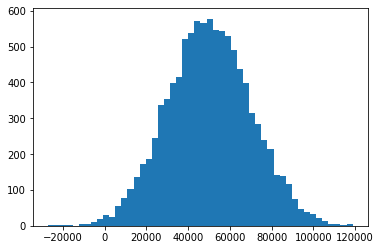

In [4]:
import matplotlib.pyplot as plt
plt.hist(normal, 50)
plt.show()

When we have that te mean and media could be relevant data when we study a big amount of informatiom, but we have to take care with it. Because when the outliers could lead to a misnderstanding related to the information.

Let us think that previous distribution describes the salary of a person per year in the United States, so think that the richest person in the earn 37666666667, let us compare the previous mean with the new mean, so, do the same for the median:

In [5]:
normal1=np.append(normal, 37666666667)
mean1=np.mean(normal1)
print(f'The mean with the original dataset is {mean} and the new is {mean1}')
print(f'The difference between this two means is really huge, it is {mean1-mean}')

The mean with the original dataset is 50127.469495 and the new is 3816412.4949455066
The difference between this two means is really huge, it is 3766285.0254505067


In [6]:
median1=np.median(normal)
print(f'The median of the original dataset is {median} and the new is {median1}')
print(f'The difference between this two means is tiny, it is {median1-median}')

The median of the original dataset is 49992.89631562693 and the new is 49992.89631562693
The difference between this two means is tiny, it is 0.0


**Conclusion:** So, the median could lead to a better understanding about the distribution of the information while that mean could change abruptly according to the several outliers in our dataset. Therefore, it is a good idea to see each dataset carefully.

## **Mode**

According to a big amount of data, we can consider those values which have more repetitions. So let us call some random values using numpy tools and seek for this mode.

We are going to consider the values according to a rating of a video in a web page, this video has from 0 to 5 stars, being 0 the worst rate and 5 the best rate.

In [7]:
stars=np.random.randint(0, high=5, size=250)
stars

array([4, 4, 4, 1, 4, 1, 0, 3, 0, 2, 4, 0, 3, 2, 2, 1, 4, 1, 0, 2, 2, 4,
       4, 0, 4, 4, 0, 3, 0, 1, 0, 0, 0, 3, 4, 4, 2, 1, 2, 3, 3, 4, 3, 4,
       0, 3, 0, 1, 2, 3, 0, 0, 3, 0, 1, 0, 2, 0, 1, 2, 3, 4, 1, 1, 4, 3,
       2, 2, 4, 0, 2, 1, 4, 2, 2, 4, 4, 1, 4, 1, 3, 0, 4, 1, 4, 3, 1, 2,
       3, 4, 3, 0, 2, 2, 4, 3, 2, 0, 3, 1, 0, 1, 2, 2, 0, 0, 4, 2, 0, 3,
       3, 0, 3, 1, 4, 3, 3, 1, 4, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 4, 2, 0, 2, 4,
       4, 0, 4, 0, 0, 1, 2, 1, 2, 0, 3, 1, 4, 0, 4, 0, 1, 1, 0, 3, 0, 0,
       3, 4, 0, 4, 4, 4, 3, 2, 2, 0, 0, 2, 4, 2, 0, 1, 1, 2, 4, 2, 4, 1,
       0, 2, 0, 4, 4, 0, 0, 3, 0, 4, 3, 4, 4, 0, 2, 3, 3, 0, 0, 0, 2, 2,
       4, 0, 0, 3, 1, 1, 3, 2, 0, 2, 3, 2, 1, 0, 0, 3, 2, 4, 0, 0, 2, 1,
       3, 3, 2, 1, 0, 4, 3, 2])

In [8]:
from scipy import stats
mode=stats.mode(stars)
mode

ModeResult(mode=array([0]), count=array([63]))

In [9]:
print(f'Note that the value of the mode is {mode.mode[0]} with an number of repetitions of {mode.count[0]} times.' )

Note that the value of the mode is 0 with an number of repetitions of 63 times.


Let us see a set with few elements in order to see that `stats.mode(list)}` has a problem because only returns one value for the mode, so we are going to define a function such extract all the possible mode in a list. 

In [10]:
arr=np.array([0,1,2,3,4,1,1,1,1,3,3,3,3])
arr

array([0, 1, 2, 3, 4, 1, 1, 1, 1, 3, 3, 3, 3])

In [11]:
def multimode(arr):
  '''
  Description of the multiple modes of an array describe in a dictionary
  keys are the mode and values are counts
  '''
  a=True
  mode=stats.mode(arr)
  arr_new=np.delete(arr, np.where(arr == mode.mode[0]))
  dict_mode={mode.mode[0] : mode.count[0]}
  while a:
    mode2=stats.mode(arr_new)
    if mode.count[0] == mode2.count[0]:
      dict_mode[mode2.mode[0]]=mode2.count[0]
      arr_new=np.delete(arr_new, np.where(arr_new == mode2.mode[0]))
    else:
      a=False
  return dict_mode

multimode(arr)

{1: 5, 3: 5}